In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kitti_data = \
[    
["00", "2011_10_03", "2011_10_03_drive_0027", "000000", "004540"],
["01", "2011_10_03", "2011_10_03_drive_0042", "000000", "001100"],
["02", "2011_10_03", "2011_10_03_drive_0034", "000000", "004660"],

["03", "2011_09_26", "2011_09_26_drive_0067", "000000", "000800"],

["04", "2011_09_30", "2011_09_30_drive_0016", "000000", "000270"],
["05", "2011_09_30", "2011_09_30_drive_0018", "000000", "002760"],
["06", "2011_09_30", "2011_09_30_drive_0020", "000000", "001100"],
["07", "2011_09_30", "2011_09_30_drive_0027", "000000", "001100"],
["08", "2011_09_30", "2011_09_30_drive_0028", "001100", "005170"],
["09", "2011_09_30", "2011_09_30_drive_0033", "000000", "001590"],
["10", "2011_09_30", "2011_09_30_drive_0034", "000000", "001200"]
]

# Load Data

In [5]:
# Load the saved arrays from the file
import numpy as np
import matplotlib.pyplot as plt
import pickle


datastr = 'kitti'

train_portion=1
start_id = 0
loss_weight='(1,0.1,10,0.1)'
lr = '3e-6'

exp_type = 'mono'
# exp_type = 'stereo'

# save_traj = False
# vis_result = False
# trajectories = []


prefix = f'kitti_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_{exp_type}'
# f'kitti_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_{exp_type}.npz'

print(prefix)

with open(f'trajectories_{prefix}.pkl', 'rb') as file:
    trajectories1 = pickle.load(file)

# print(trajectories1)

loaded_data = np.load(f'results_{prefix}.npz')

# Extract the arrays from the dictionary
kitti_vo_result_table = loaded_data['kitti_vo_result_table']
kitti_pgo_result_table = loaded_data['kitti_pgo_result_table']
kitti_vo_rotation_table = loaded_data['kitti_vo_rotation_table']
kitti_pgo_rotation_table = loaded_data['kitti_pgo_rotation_table']
kitti_vo_translation_table = loaded_data['kitti_vo_translation_table']
kitti_pgo_translation_table = loaded_data['kitti_pgo_translation_table']

kitti_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p1_mono


# print table

In [4]:
# Load the saved arrays from the file
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
train_portion=1
# loss_weight='(4,0.1,2,0.1)'
# lr = '3e-6'

loss_weight='(1,0.1,10,0.1)'
lr = '3e-6'

# types = ["rot", "trans","ATE"]
types = ["ATE"]
end_epoch = 7 

items = [f'Ours {exp_type} VO (initial)', f'Ours {exp_type} VO (final)', f'Ours {exp_type} PGO (initial)', f'Ours {exp_type} PGO (final)']


for exp_type in ['mono', 'stereo']:
    for train_portion in [0.25, 0.5, 1]:
        prefix = f'kitti_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_{exp_type}'
        print(prefix)

        # Load data
        with open(f'trajectories_{prefix}.pkl', 'rb') as file:
            trajectories1 = pickle.load(file)

        loaded_data = np.load(f'results_{prefix}.npz')

        # Extract the arrays from the dictionary
        kitti_vo_result_table = loaded_data['kitti_vo_result_table']
        kitti_pgo_result_table = loaded_data['kitti_pgo_result_table']
        kitti_vo_rotation_table = loaded_data['kitti_vo_rotation_table']
        kitti_pgo_rotation_table = loaded_data['kitti_pgo_rotation_table']
        kitti_vo_translation_table = loaded_data['kitti_vo_translation_table']
        kitti_pgo_translation_table = loaded_data['kitti_pgo_translation_table']


        for type in types:
            output_table = []
            if type == "rot":
                output_table.append(kitti_vo_rotation_table[:,0].tolist())
                output_table.append(kitti_vo_rotation_table[:,end_epoch].tolist())
                output_table.append(kitti_pgo_rotation_table[:,0].tolist())
                output_table.append(kitti_pgo_rotation_table[:,end_epoch].tolist())
            elif type == "trans":
                output_table.append(kitti_vo_translation_table[:,0].tolist())
                output_table.append(kitti_vo_translation_table[:,end_epoch].tolist())
                output_table.append(kitti_pgo_translation_table[:,0].tolist())
                output_table.append(kitti_pgo_translation_table[:,end_epoch].tolist())
                output_table
            elif type == "ATE":
                output_table.append(kitti_vo_result_table[:,0].tolist())
                output_table.append(kitti_vo_result_table[:,end_epoch].tolist())
                output_table.append(kitti_pgo_result_table[:,0].tolist())
                output_table.append(kitti_pgo_result_table[:,end_epoch].tolist())

            # Add 'items' as the first column in 'data'
            output_table = [[item] + row for item, row in zip(items, output_table)]

            # Convert the 2D list to a pandas DataFrame
            df = pd.DataFrame(output_table)
            df = df.drop(df.columns[4], axis=1)
            df = df.round(3)
            # Write the DataFrame to an Excel file

            csv_string = df.to_csv(index=False, header=False)
            print(f"KITTI {exp_type} {lr} {type}")
            print(csv_string)

kitti_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p0.25_mono
KITTI mono 3e-6 ATE
Ours stereo VO (initial),60.191,51.681,70.275,2.152,52.236,10.72,14.641,63.876,28.19,12.913
Ours stereo VO (final),49.324,20.97,52.824,0.591,24.008,10.886,5.255,37.661,18.151,8.16
Ours stereo PGO (initial),105.923,6.303,30.108,0.305,7.65,12.931,2.424,29.994,5.386,1.401
Ours stereo PGO (final),105.38,5.223,26.733,0.285,4.832,6.474,2.165,29.803,3.471,1.254

kitti_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p0.5_mono
KITTI mono 3e-6 ATE
Ours stereo VO (initial),59.876,51.68,70.261,2.149,52.125,10.75,14.539,63.196,28.106,12.938
Ours stereo VO (final),63.703,19.348,81.064,0.581,22.87,11.378,4.522,37.571,19.403,7.943
Ours stereo PGO (initial),105.927,6.304,30.1,0.304,7.674,12.942,2.424,30.001,5.383,1.402
Ours stereo PGO (final),105.542,5.37,28.216,0.284,3.413,6.973,2.145,29.784,3.26,1.249

kitti_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p1_mono
KITTI mono 3e-6 ATE
Ours st

# plot error result

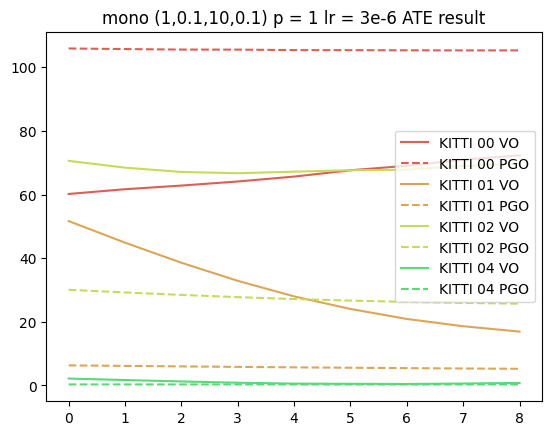

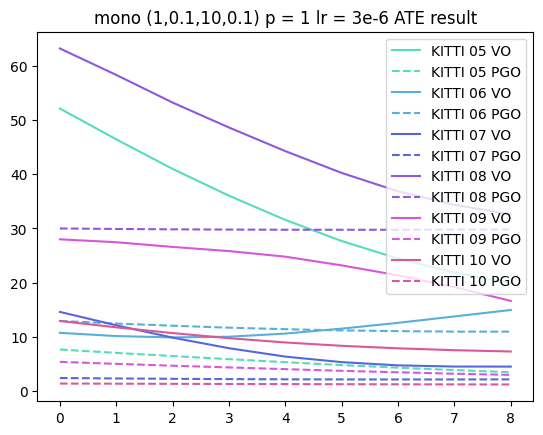

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a palette with 11 distinct colors
palette = sns.color_palette("hls", 11)

end_epoch = 9

def plot_result_table(vo_result_table, pgo_result_table, title=None,start_idx = 0,end_idx =5):
    plt.figure()
    for i in range(start_idx, end_idx):
        if vo_result_table[i,0] !=0 :
            label = f'KITTI {i:02}'
            # Use the color from the palette for this plot
            
            plot_res = vo_result_table[i,:end_epoch]
            plot_res = plot_res[plot_res != 0]
            plt.plot(plot_res, color=palette[i], label=label + ' VO')

            plot_res = pgo_result_table[i,:end_epoch]
            plot_res = plot_res[plot_res != 0]

            plt.plot(plot_res, color=palette[i], linestyle='--', label=label + ' PGO' )

    plt.legend()
    plt.title(title)

plot_vo_table = kitti_vo_result_table
plot_pgo_table = kitti_pgo_result_table

# plot_vo_table = kitti_vo_translation_table
# plot_pgo_table = kitti_pgo_translation_table

# plot_vo_table = kitti_vo_rotation_table
# plot_pgo_table = kitti_pgo_rotation_table


plot_result_table(plot_vo_table,plot_pgo_table, title = f'{exp_type} {loss_weight} p = {train_portion} lr = {lr} ATE result',start_idx = 0,end_idx =5)
plot_result_table(plot_vo_table,plot_pgo_table, title = f'{exp_type} {loss_weight} p = {train_portion} lr = {lr} ATE result',start_idx = 5,end_idx =11)


/tmp/ipykernel_3549463/3273110914.py:8: RuntimeWarning: invalid value encountered in divide
  kitti_vo_result_table_percent[i,:end_epoch] = kitti_vo_result_table[i,:end_epoch]/kitti_vo_result_table[i,0]
/tmp/ipykernel_3549463/3273110914.py:9: RuntimeWarning: invalid value encountered in divide
  kitti_pgo_result_table_percent[i,:end_epoch] = kitti_pgo_result_table[i,:end_epoch]/kitti_pgo_result_table[i,0]


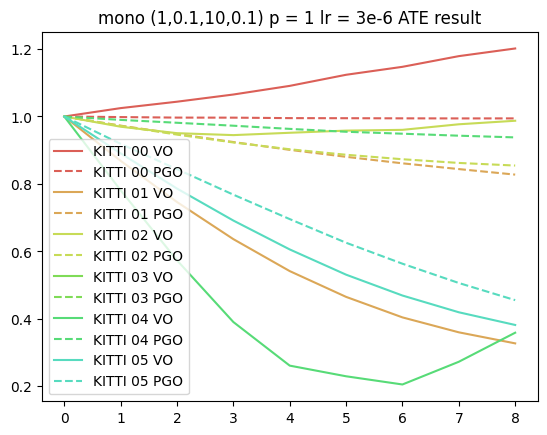

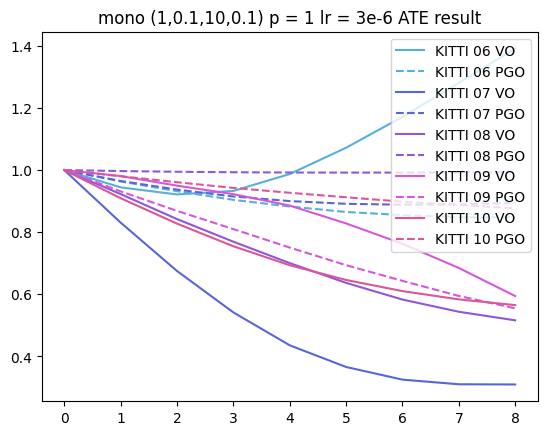

In [7]:
kitti_vo_result_table.shape

kitti_vo_result_table_percent = kitti_vo_result_table
kitti_pgo_result_table_percent = kitti_pgo_result_table

for i in range(11):
    try:
        kitti_vo_result_table_percent[i,:end_epoch] = kitti_vo_result_table[i,:end_epoch]/kitti_vo_result_table[i,0]
        kitti_pgo_result_table_percent[i,:end_epoch] = kitti_pgo_result_table[i,:end_epoch]/kitti_pgo_result_table[i,0]
    except Exception as e:
        print("An error occurred: ", e)

plot_result_table(kitti_vo_result_table_percent,kitti_pgo_result_table_percent, title = f'{exp_type} {loss_weight} p = {train_portion} lr = {lr} ATE result',start_idx = 0,end_idx =6)
plot_result_table(kitti_vo_result_table_percent,kitti_pgo_result_table_percent, title = f'{exp_type} {loss_weight} p = {train_portion} lr = {lr} ATE result',start_idx = 6,end_idx =11)


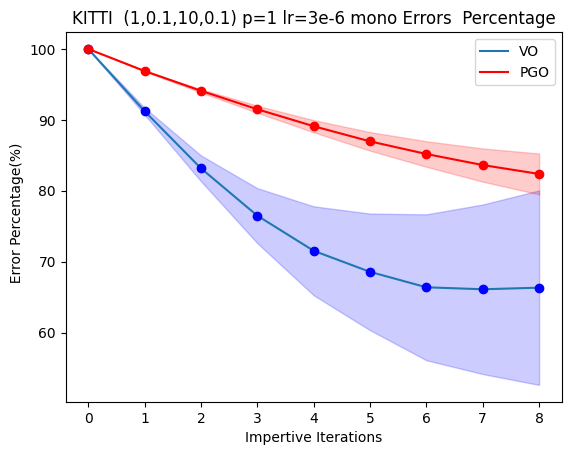

In [8]:
import numpy.ma as ma
masked_kitti_vo_result_table_plot = ma.masked_equal(kitti_vo_result_table_percent, 0)
masked_kitti_vo_result_table_plot = ma.masked_invalid(masked_kitti_vo_result_table_plot)

# end_epoch = 10
vo_mean = 100 * ma.mean(masked_kitti_vo_result_table_plot, axis=0)[:end_epoch]
vo_variance  = 100 * ma.var(masked_kitti_vo_result_table_plot, axis=0)[:end_epoch]

plt.plot(vo_mean,label = 'VO')
plt.plot(vo_mean,'bo')


# mean = np.mean(kitti_vo_result_table_plot)
# variance = np.var(data)

# Plot the variance as a shaded region
plt.fill_between(range(len(vo_mean)), vo_mean - vo_variance, vo_mean + vo_variance, alpha=0.2, color='b')


masked_table_plot = ma.masked_equal(kitti_pgo_result_table_percent, 0)
masked_table_plot = ma.masked_invalid(masked_table_plot)

pgo_mean = 100 * ma.mean(masked_table_plot, axis=0)[:end_epoch]
pgo_variance  =  100 * ma.var(masked_table_plot, axis=0)[:end_epoch]

plt.plot(pgo_mean,'r',label = 'PGO')
plt.plot(pgo_mean,'ro')
# Plot the variance as a shaded region
plt.fill_between(range(len(pgo_mean)), pgo_mean - pgo_variance, pgo_mean + pgo_variance, alpha=0.2, color='r')
# plt.title(f'KITTI  {exp_type} Errors  Percentage') 
plt.title(f'KITTI  {loss_weight} p={train_portion} lr={lr} {exp_type} Errors  Percentage') 


plt.xlabel('Impertive Iterations')
plt.ylabel(f'  Error Percentage(%)')
# Set the x-axis locator to display only integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.legend()
plt.show()

In [9]:
prefix

'kitti_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p1_mono'

In [10]:
np.savez(f'percentage_{prefix}.npz', 
vo_mean = vo_mean, vo_variance = vo_variance, pgo_mean = pgo_mean, pgo_variance = pgo_variance)

# plot trajectory

## exp1 final iter.

In [4]:
end_epoch = 7

save figure to ./exp_figures3/KITTI_05_stereo_legend.pdf


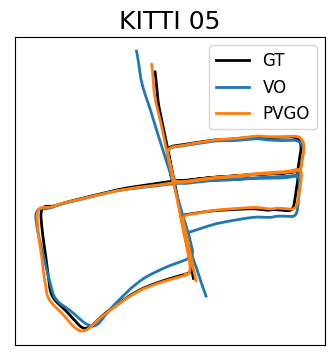

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/KITTI_07_stereo_legend.pdf


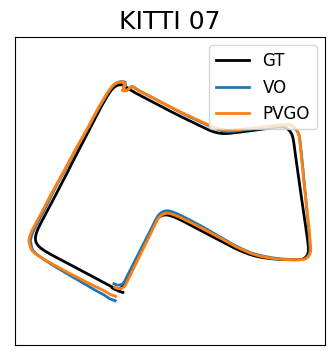

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/KITTI_08_stereo_legend.pdf


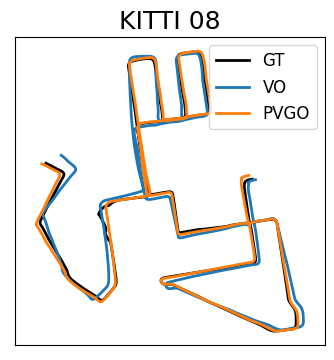

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/KITTI_09_stereo_legend.pdf


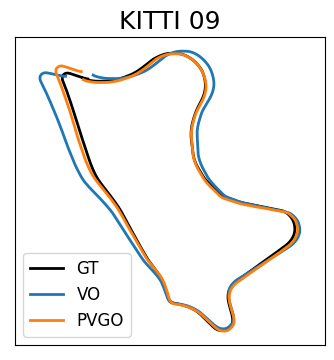

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)


In [11]:


import pypose as pp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

# Create a color map with varying intensities
num_trajectories  = end_epoch
colors = plt.cm.Blues(np.linspace(0.2, 1, num_trajectories))

save_traj = [5,7,8,9]
# save_traj = np.linspace(0,10,11).astype(int)

traj_types = ['VO','PGO']
# traj_types = ['PGO']

# for traj_id in range(5,6):
# for traj_id in range(8,9):
# for traj_id in range(plot_id,plot_id+1):

fig_size = 4
lw = 2
for traj_id in save_traj:
    if traj_id == 3:
        continue
    # for traj_type in traj_types:

    # plt.subplot(111)
    fig = plt.figure(figsize=(fig_size, fig_size))
    gt_aligned = trajectories1[traj_id][0]['gt_aligned']

    plt.plot(gt_aligned[:, 0], gt_aligned[:, 1],
                        c='k', label='GT', linewidth=lw)
    # for epoch_id in range(0,end_epoch,2):
    # for epoch_id in range(0,10):
    epoch_id = end_epoch - 1
    try:
        vo_est_aligned = trajectories1[traj_id][epoch_id]['vo_est_aligned']
        pgo_est_aligned = trajectories1[traj_id][epoch_id]['pgo_est_aligned']
        
        '''
        vo_est_aligned = pp.SE3(trajectories1[traj_id][epoch_id]['vo_est_aligned'])
        pgo_est_aligned = pp.SE3(trajectories1[traj_id][epoch_id]['pgo_est_aligned'])
        vo_est_aligned = vo_est_aligned[0].Inv() * vo_est_aligned
        pgo_est_aligned = pgo_est_aligned[0].Inv() *  pgo_est_aligned
        '''

        # if traj_type == 'VO':
        plt.plot(vo_est_aligned[:, 0], vo_est_aligned[:, 1],
                label=f'VO', linewidth=lw)
        
        # elif traj_type == 'PGO':
        plt.plot(pgo_est_aligned[:, 0], pgo_est_aligned[:, 1],
                # linestyle='dashed', 
                # color=colors[epoch_id],
                label=f'PVGO', linewidth=lw)
    
    except Exception as e:
        print("An error occurred: ", e)

    # plt.plot(gt_aligned[0, 0], gt_aligned[0, 1],
    #             'o', label='start')

    plt.axis('equal')

    add_legend = True
    if add_legend:
        plt.legend()
    # plt.grid(True)
    traj_id_str = str(traj_id).zfill(2)

    title = f'KITTI {traj_id_str}'
    savefigname = f'KITTI {traj_id_str} {exp_type}'
    

    plt.title(title, fontsize=18)
    plt.xticks([])
    plt.yticks([])

    # Adjust the left and right padding
    # plt.subplots_adjust(left=0.1, right=0.9)

    savefigname = savefigname.replace(' ','_')
    old_savefigname = savefigname
    if add_legend:
        savefigname = './exp_figures3/' + savefigname +'_legend' + '.pdf'
    else:
        savefigname = './exp_figures3/' + savefigname + '.pdf'
    save_fig = True

    # plt.tight_layout()
    if savefigname is not None and save_fig:
        # plt.savefig(savefigname, bbox_inches='tight', pad_inches=0.1)
        print(f'save figure to {savefigname}')
        plt.savefig(savefigname ,bbox_inches='tight', pad_inches=0.05)
    
    vis = True
    if vis:
        plt.show()
    plt.close(fig)

    from PyPDF2 import PdfWriter, PdfReader, PdfMerger
    reader = PdfReader(savefigname)
    writer = PdfWriter()

    page = reader.pages[0]
    print(page.cropbox.lower_left)
    print(page.cropbox.lower_right)
    print(page.cropbox.upper_left)
    print(page.cropbox.upper_right)

    for page in reader.pages:
        page.cropbox.upper_left = (4,4)
        page.cropbox.lower_right = page.cropbox.upper_right
        writer.add_page(page) 
    
    with open('./exp_figures3/' + old_savefigname +'_legend_crop' + '.pdf','wb') as fp:
        writer.write(fp) 

## exp2

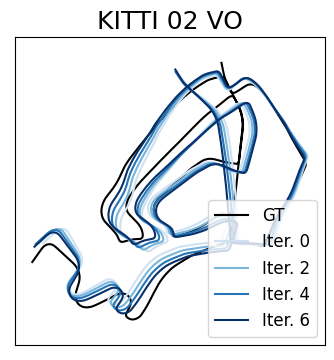

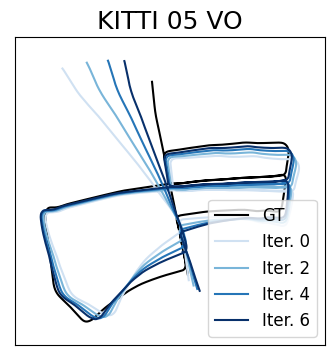

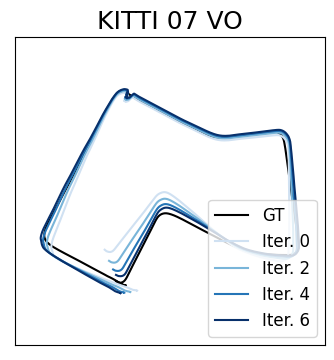

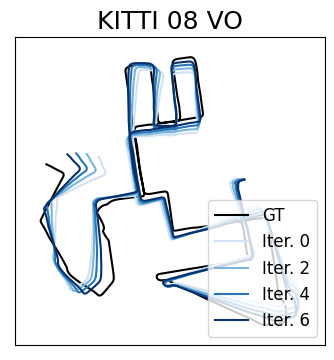

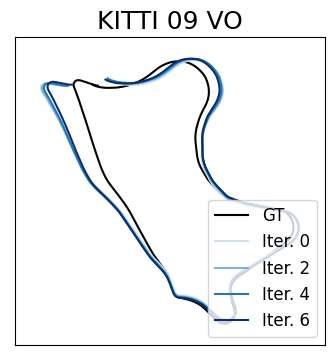

In [13]:
import pypose as pp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12

# plt.plot(gtposes[:, 0], gtposes[:, 1],
#             linestyle='dashed', c='k', label='Ground Truth')

end_epoch = 7
# Create a color map with varying intensities
num_trajectories  = end_epoch
colors = plt.cm.Blues(np.linspace(0.2, 1, num_trajectories))

# save_traj = [5]
save_traj = [2,5,7,8,9]
# save_traj = np.linspace(0,10,11).astype(int)
# traj_types = ['VO','PGO']
traj_types = ['VO']

fig_size = 4

for traj_id in save_traj:
    if traj_id == 3:
        continue
    for traj_type in traj_types:

        # plt.subplot(111)
        # fig = plt.figure(figsize=(3, 3))
        # fig = plt.figure(figsize=(4, 4))
        fig = plt.figure(figsize=(fig_size, fig_size))

        # fig = plt.figure(figsize=(6, 6))
        # gt_aligned = pp.SE3(trajectories1[traj_id][0]['gt_aligned'])
        gt_aligned = trajectories1[traj_id][0]['gt_aligned']

        plt.plot(gt_aligned[:, 0], gt_aligned[:, 1],
                            c='k', 
                            label='GT'
                            # label='Ground Truth'
                            )
        for epoch_id in range(0,end_epoch,2):
        # for epoch_id in range(0,10):
            try:
            
                vo_est_aligned = trajectories1[traj_id][epoch_id]['vo_est_aligned']
                pgo_est_aligned = trajectories1[traj_id][epoch_id]['pgo_est_aligned']
                
                '''
                vo_est_aligned = pp.SE3(trajectories1[traj_id][epoch_id]['vo_est_aligned'])
                pgo_est_aligned = pp.SE3(trajectories1[traj_id][epoch_id]['pgo_est_aligned'])
                vo_est_aligned = vo_est_aligned[0].Inv() * vo_est_aligned
                pgo_est_aligned = pgo_est_aligned[0].Inv() *  pgo_est_aligned
                '''

                # plt.plot(gt_aligned[0, 0], gt_aligned[0, 1],
                #             'ko', label='Ground Truth start')

                if traj_type == 'VO':
                    plt.plot(vo_est_aligned[:, 0], vo_est_aligned[:, 1],
                            label=f'Iter. {epoch_id}', color=colors[epoch_id])
                
                elif traj_type == 'PGO':
                    plt.plot(pgo_est_aligned[:, 0], pgo_est_aligned[:, 1],
                            # linestyle='dashed', 
                            color=colors[epoch_id],
                            label=f'Iter. {epoch_id}')

            except Exception as e:
                print("An error occurred: ", e)

        # plt.plot(gt_aligned[0, 0], gt_aligned[0, 1],
        #             'o', label='start')

        # font_size = 8
        plt.axis('equal')
        # plt.xlabel('x (m)')
        # plt.ylabel('y (m)')
        # plt.legend(loc='lower right')
        plt.legend(loc='lower right')
        # plt.grid(True)
        traj_id_str = str(traj_id).zfill(2)

        title = f'KITTI {traj_id_str} {traj_type}'
        save_file_name = f'KITTI {traj_id_str} {exp_type} {traj_type}'
        plt.title(title,fontsize=18)
        plt.xticks([])
        plt.yticks([])

        save_file_name = save_file_name.replace(' ','_')
        savefigname = 'exp_figures3/' + save_file_name+'_legend' + '.pdf'
        save_fig = True

        
        if savefigname is not None and save_fig:
            plt.margins(x=0.1, y=0.1)
            plt.savefig(savefigname, bbox_inches='tight', pad_inches=0.05)
        vis = True
        if vis:
            plt.show()
        plt.close(fig)


        from PyPDF2 import PdfWriter, PdfReader, PdfMerger
        reader = PdfReader(savefigname)
        writer = PdfWriter()

        page = reader.pages[0]
        # print(page.cropbox.lower_left)
        # print(page.cropbox.lower_right)
        # print(page.cropbox.upper_left)
        # print(page.cropbox.upper_right)

        for page in reader.pages:
            page.cropbox.upper_left = (4,4)
            page.cropbox.lower_right = page.cropbox.upper_right
            writer.add_page(page) 
        
        with open('./exp_figures3/' + old_savefigname +'_legend_crop' + '.pdf','wb') as fp:
            writer.write(fp) 

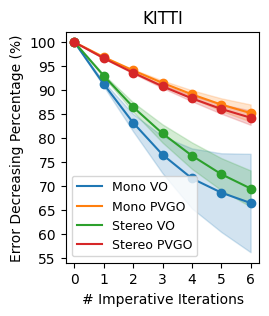

In [11]:
# Set the color cycle
import matplotlib.pyplot as plt
import numpy as np
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


# mono_data = np.load('percentage_kitti_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p1_mono.npz')
mono_data = np.load(f'percentage_kitti_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_mono.npz')

end_epoch= 7
vo_mean = mono_data['vo_mean'][:end_epoch]
vo_variance = mono_data['vo_variance'][:end_epoch]
pgo_mean = mono_data['pgo_mean'][:end_epoch]
pgo_variance = mono_data['pgo_variance'][:end_epoch]


i = 0
# plt.figure(figsize=(5, 2))
plt.figure(figsize=(2.5, 3))
plt.plot(vo_mean,label = 'Mono VO',color=color_cycle[i])
plt.plot(vo_mean,'o',color=color_cycle[i])

# Plot the variance as a shaded region
plt.fill_between(range(len(vo_mean)), vo_mean - vo_variance, vo_mean + vo_variance, alpha=0.2,color=color_cycle[i])

i += 1

plt.plot(pgo_mean,label = 'Mono PVGO',color=color_cycle[i])
plt.plot(pgo_mean,'o',color=color_cycle[i])
# Plot the variance as a shaded region
plt.fill_between(range(len(pgo_mean)), pgo_mean - pgo_variance, pgo_mean + pgo_variance, alpha=0.2,color=color_cycle[i])
# plt.title(f'KITTI {exp_type} Errors  Percentage') 
plt.xlabel('Impertive Iterations')
plt.ylabel(f'  Error Percentage(%)')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# stereo_data = np.load('percentage_kitti_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p1_stereo.npz')
stereo_data = np.load(f'percentage_kitti_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_stereo.npz')


vo_mean = stereo_data['vo_mean'][:end_epoch]
vo_variance = stereo_data['vo_variance'][:end_epoch]
pgo_mean = stereo_data['pgo_mean'][:end_epoch]
pgo_variance = stereo_data['pgo_variance'][:end_epoch]

i += 1
plt.plot(vo_mean,label = 'Stereo VO',color=color_cycle[i])
plt.plot(vo_mean,'o',color=color_cycle[i])
# Plot the variance as a shaded region
plt.fill_between(range(len(vo_mean)), vo_mean - vo_variance, vo_mean + vo_variance, alpha=0.2,color=color_cycle[i])

i += 1
plt.plot(pgo_mean,label = 'Stereo PVGO',color=color_cycle[i])
plt.plot(pgo_mean,'o',color=color_cycle[i])
# Plot the variance as a shaded region
plt.fill_between(range(len(pgo_mean)), pgo_mean - pgo_variance, pgo_mean + pgo_variance, alpha=0.2,color=color_cycle[i])
plt.title(f'KITTI') 
plt.xlabel('# Imperative Iterations')
plt.ylabel(f'Error Decreasing Percentage (%)')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# plt.grid(which='major')

plt.legend(fontsize=9,loc='lower left')
plt.savefig('./exp_figures3/kitti_error_percentage_2.pdf', bbox_inches='tight', pad_inches=0.05)